# SEXUAL HARASSMENT PERSONAL STORIES CLASSIFICATION

## Problem Statement:

Given a Personal story, have to analyze and categorize various forms of Sexual Harassment.

## Data Overview:

In recent ages , an increasing number of Personal Stories about Sexual Harassement and sexual abuse have been shared online. It is tedious to categorize the various forms of sexual harassement based on the stories, because large manual power will be required. But with the help of Machine learning it is quite easy and faster actions can be taken.This data is provided by an Online Forum SafeCity. So here the main task is to classify the various forms of sexual harassement based on the stories.There are various forms of sexual harassement but in this dataset only top three categorizes such as Commenting, Ogling/Facial Expressions/Staring and Touching/Groping are considered.


**Multi-Label Classification:**

The data for multi-label classification is given in four 
columns, with the first column being the description of the incident and 
the second, third, and fourth column being 1 if the category of sexual 
harassment is present and 0 if it is not.There are 7201 training samples, 
990 development samples, and 1701 test samples.




**-Example for Multi-Label Classification Dataset:**

Description | Commenting | Ogling | Groping
----------|---------------|----------|---------------
**Was walking along crowded street, holding mums hand, when an elderly man groped butt, I turned to look at h7m and he looked away, and did it again after a while.I was 12 yrs old then. |	0 |	0 |	1
**This incident took place in the evening.I was in the metro when two guys started staring. | 0 | 1 | 0
**Catcalls and passing comments were two of the ghastly things the Delhi police at the International Airport put me and my friend through. It is appalling that the protectors and law enforcers at the airport can make someone so uncomfortable. | 1 | 1 | 0



**-Number of Examples in Multi-Label Classification:**

Commenting | Ogling | Groping | Examples in Dataset
----------|---------------|----------|---------------
1 | 1 | 1 | 351
1 | 1 | 0 | 819
1 | 0 | 1 | 459
0 | 1 | 1 | 201
1 | 0 | 0 | 2256
0 | 0 | 1 | 1966
0 | 1 | 0 | 743
0 | 0 | 0 | 3097

## Business Objective and Constraints:

There is not much requirement for faster results similar to Search Engine(Eg:Google) but little lower than that like within few mins.

# Performance Metrics:

This CaseStudy is based on ResearchPaper: https://arxiv.org/pdf/1809.04739.pdf

**Multi-Label Classification:**

**-->Hamming Loss**

**-->Micro F1-Score**

**-->Accuracy**



In [1]:
#Importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle
from tqdm import tqdm
import os
%matplotlib inline

## Multilabel Classification:

In [2]:
df_train=pd.read_csv('train.csv')#loading the train.csv in the Dataframe 
df_train.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [3]:
df_train.columns=['Description','commenting','ogling','groping']#renaming column names
df_train.head()

,Description,commenting,ogling,groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [4]:
df_train.iloc[:,1:].sum()#getting the columns except description and counting the values for each category

commenting    2820
ogling        1526
groping       2166
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


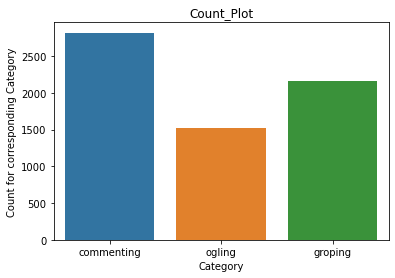

In [5]:
#Count plot for each category
sns.barplot(df_train.columns[1:].values,df_train.iloc[:,1:].sum().values)
plt.title("Count_Plot")
plt.xlabel("Category")
plt.ylabel("Count for corresponding Category")
plt.show()

**Observation:**

From this plot we can see the corresponding count for each category.

***commenting-->2820***

***ogling    -->1526***

***groping   -->2166***

In [6]:
df_train.iloc[:,1:].sum(1).value_counts()#counting no of text points having multilabels

1    3627
0    2253
2    1078
3     243
dtype: int64

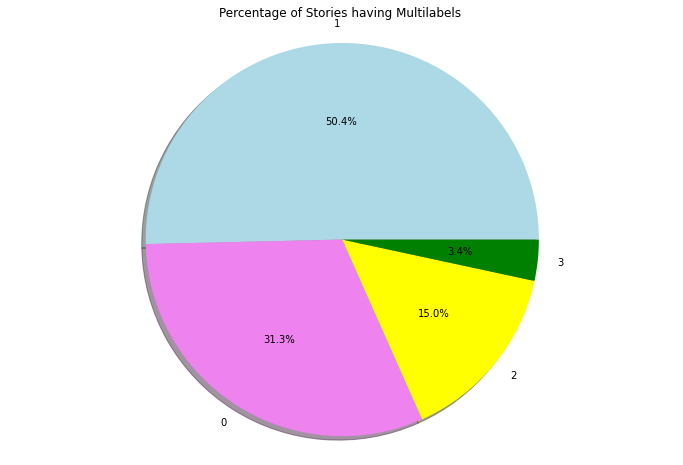

In [7]:
#plotting percentage of stories having Multilabels
values=df_train.iloc[:,1:].sum(1).value_counts()
plt.figure(figsize=(12,8))
plt.pie(values,labels=['1','0','2','3'],shadow=True,autopct='%1.1f%%',\
        colors=['lightblue','violet','yellow','green'])
plt.axis('equal')
plt.title('Percentage of Stories having Multilabels ')
plt.show()

**Observation:**

This plot gives the visual representation of the no of text data points which has multilabels in the dataset.

-->2253 points have no labels which clearly depicts that the story does not correpond to any Sexual Harassment Activity.

-->3627 points corresponds to any one of Category which may be commenting or groping or ogling.

-->1078 points corresponds to any of two Category which may be (commenting and groping) or (commenting and ogling) or (ogling and groping).

-->243 points corresponds to all the three Category such as commenting,ogling and groping.

In [9]:
vect=CountVectorizer()#in the presence of stop words
output=vect.fit_transform(df_train['Description'])
features=vect.get_feature_names()#here we are getting the unique feature names

#https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
count=output.toarray().sum(axis=0)#here we are getting the count of unique words

df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:40]#Top 40 words with most word count
df

,0
and,6448
the,5964
was,5376
to,4866
in,3556
my,3428
me,3299
of,2501
on,2169
at,1977


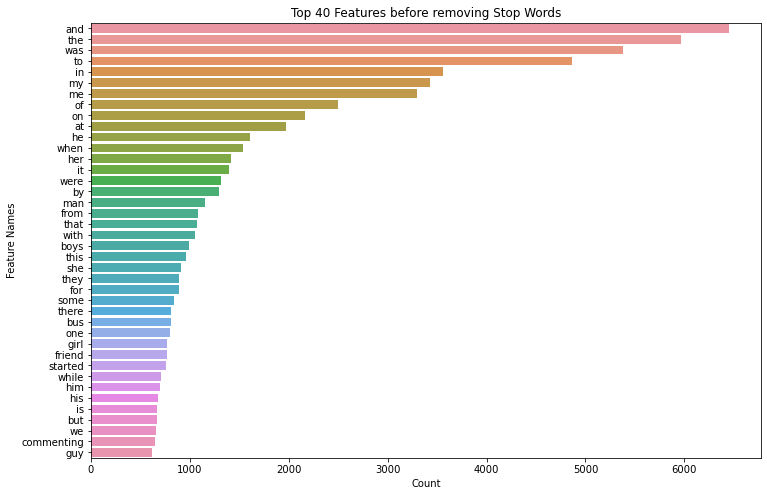

In [10]:
x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 40 Features before removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

In [11]:
vect=CountVectorizer(stop_words=set(stopwords.words('english')))#in the presence of stop words
output=vect.fit_transform(df_train['Description'])
features=vect.get_feature_names()#here we are getting the unique feature names
count=output.toarray().sum(axis=0)#here we are getting the count of unique words
df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:40]#Top 40 words with most word count
df

,0
man,1156
boys,991
bus,807
one,798
girl,771
friend,769
started,761
commenting,651
guy,618
happened,589


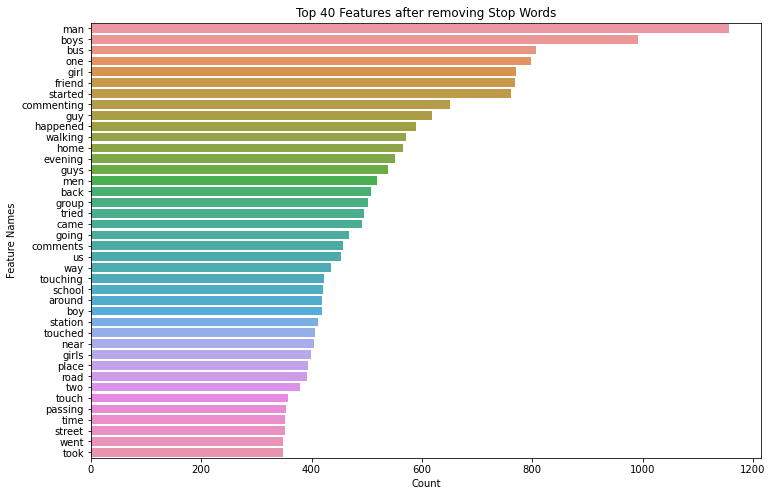

In [12]:
x=df.index
y=[df[0][i] for i in range(len(df))]
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 40 Features after removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

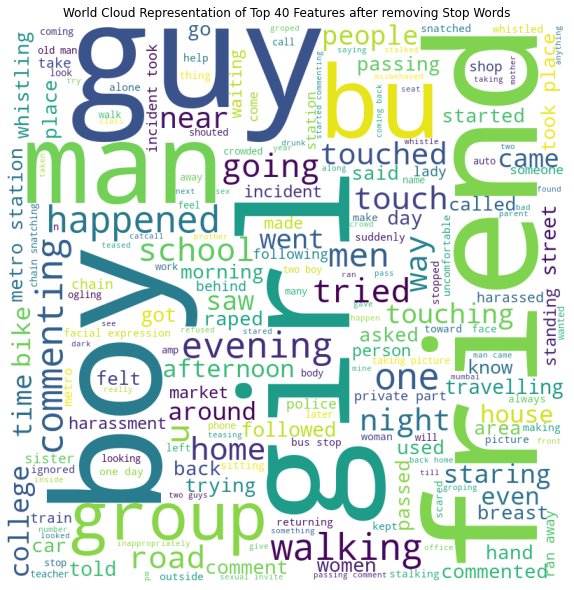

In [13]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

# Python program to generate WordCloud 
  
# importing all necessery modules 

import matplotlib.pyplot as plt 
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_train['Description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image         

plt.figure(figsize = (8, 8), facecolor = None) 
plt.title('World Cloud Representation of Top 40 Features after removing Stop Words')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Observation:**

By using the Count Vectorizer, we are getting the Top 40 Features that occur more frequently in the Description.
First before removing stop words we could see that more number of stopwords repeated in the whole corpus.
But after removing stop words and analysing it using barplot and Word Cloud Representation we could see that man,boys,bus,one, girl,friend,started,commenting,guy,happened,walking,home etc these are the most frequent words occuring in this whole corpus.
Since it is Personal Stories about Sexual Harassment written by various people through online these Top 40 Features represent that these are features people used frequently while writing the personal stories.

In [14]:
from nltk.corpus import stopwords
vect=TfidfVectorizer(stop_words=set(stopwords.words('english')))
output=vect.fit_transform(df_train['Description'])
features=vect.get_feature_names()
idf_values=vect.idf_
df=pd.DataFrame(idf_values,features)
df=df.sort_values(by=0,ascending=False)
df=df[:40]
df

,0
spilt,9.188967
rebelled,9.188967
societal,9.188967
goapune,9.188967
societies,9.188967
societys,9.188967
gnr,9.188967
glimpse,9.188967
sociocultural,9.188967
reference,9.188967


**Observation:**

These are some of the rare words used in the whole text, which is obtained by taking the idf values and sorting them in the
descending order of the idf values.

In [15]:
#Sentimental Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import numpy as np
def sentiment_score(X,feature):
    count,count1,count2=0,0,0
    for i in range(len(X)):
        for_sentiment=X[feature].iloc[i]#getting the corresponding sentence based on the index values
        ss=sid.polarity_scores(for_sentiment)#doing sentimental Analysis for each sentence
        lst=list(ss.values())#storing the sentinmental values for each sentence in a list
        maximum=np.argsort(lst)[-2]#getting the position of the highest score
        if maximum==0:
            count+=1
        elif maximum==1:
            count1+=1
        else:
            count2+=1
    return count,count1,count2#returning the negative_count,neutral_count,positive_count

In [16]:
negative_count,neutral_count,positive_count=sentiment_score(df_train,'Description')

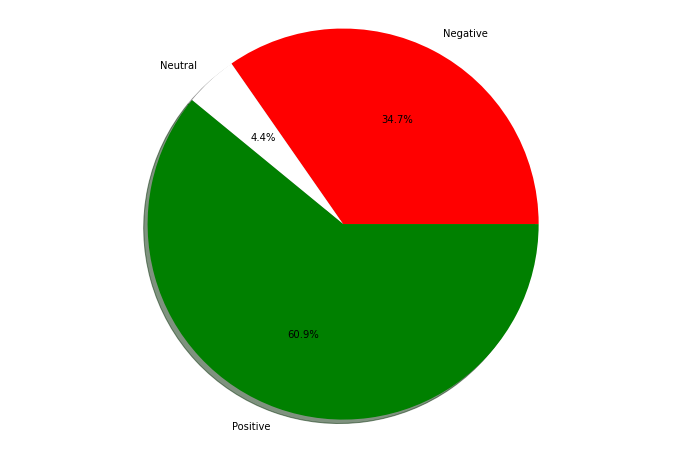

In [17]:
#pie plot of count of maximamal sentimental score of each sentence
plt.figure(figsize=(12,8))
plt.pie([negative_count,neutral_count,positive_count],labels=['Negative','Neutral','Positive'],shadow=True,autopct='%1.1f%%',\
        colors=['red','white','green'])
plt.axis('equal')
plt.show()

# Preprocessing

In [18]:
df_train.info()#info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  7201 non-null   object
 1   commenting   7201 non-null   int64 
 2   ogling       7201 non-null   int64 
 3   groping      7201 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 225.2+ KB


In [19]:
#Displaying some random text data points for analysing before preprocessing on that.
print(df_train['Description'][0])
print("-"*125)
print(df_train['Description'][100])
print("-"*125)
print(df_train['Description'][600])
print("-"*125)
print(df_train['Description'][1000])
print("-"*125)

#after visualizing that we can see that just basic preprocessing is enough.

Was walking along crowded street, holding mums hand, when an elderly man groped butt, I turned to look at h7m and he looked away, and did it again after a while.I was 12 yrs old then.
-----------------------------------------------------------------------------------------------------------------------------
I was at the tap when a boy came to pour water.  He found a 14 years old girl waiting  to fetch water and just grabbed her hands and dragged her away.
-----------------------------------------------------------------------------------------------------------------------------
A friend of mine who lives beside our house is usaully harassed.When she is going out to read, a man by name John, always harass her because he has an advantage over her but she did not like the idea.
-----------------------------------------------------------------------------------------------------------------------------
taking pictures and commenting rude behaviour ,catcalls
------------------------------

In [20]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [21]:
lemmatizer=WordNetLemmatizer()
def preprocessing(text_data):
    text = re.sub('[^A-Za-z0-9]+', ' ', text_data)#replacing characters other than alphabets and numbers with space
    text = ' '.join([word.lower() for word in text.split()])#lowering all the words
    text = [word for word in text.split() if word not in stopwords]#removing the stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text])#lemmatizing the words
    return text

In [22]:
df_train['cleaned_text']=df_train['Description'].apply(preprocessing)
df_train

,Description,commenting,ogling,groping,cleaned_text
0,"Was walking along crowded street, holding mums...",0,0,1,walking along crowded street holding mum hand ...
1,This incident took place in the evening.I was ...,0,1,0,incident took place evening metro two guy star...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,waiting bus man came bike offering liftvto you...
3,Incident happened inside the train,0,0,0,incident happened inside train
4,I witnessed an incident when a chain was bruta...,0,0,0,witnessed incident chain brutally snatched eld...
...,...,...,...,...,...
7196,There was this person near a construction site...,0,1,0,person near construction site probably laborer...
7197,He threatened me by making inappropriate conve...,1,0,0,threatened making inappropriate conversation t...
7198,happened during morning at university metro st...,1,0,0,happened morning university metro station guy ...
7199,one day my aunt was returniec frm office .. sh...,0,0,0,one day aunt returniec frm office shaunt e fou...


In [23]:
df_val=pd.read_csv('dev.csv')
df_test=pd.read_csv('test.csv')

In [24]:
df_val.columns=['Description','commenting','ogling','groping']#renaming column names
df_test.columns=['Description','commenting','ogling','groping']#renaming column names

In [25]:
df_val['cleaned_text']=df_val['Description'].apply(preprocessing)
df_test['cleaned_text']=df_test['Description'].apply(preprocessing)

In [26]:
df_train.to_csv('preprocessed_data_train.csv')
df_val.to_csv('preprocessed_data_val.csv')
df_test.to_csv('preprocessed_data_test.csv')